## Proximal methods

### Reminder of ODE interpretation of gradient descent

Consider the following ODE

$$
\frac{dx}{dt} = -f'(x(t))
$$

and after discretization

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$

where $\alpha = t_{k+1} - t_k$ is a grid step and $x_k \equiv x(t_k)$

From this follows 

$$
x_{k+1} = x_k - \alpha f'(x_k),
$$

which is equivalent to gradient descent method

### Proximal method as backward Euler scheme

$$
\frac{dx}{dt} = -f'(x(t))
$$

and after discretization in backward manner

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'({\color{red}{x_{k+1}}}),
$$

After some re-arrangements

\begin{align*}
& \left(\frac{1}{2\alpha} \|u - x_k\|_2^2 + f(u) \right)'(x_{k+1}) = 0 \\
& x_{k+1} = \arg\min_u \left(f(u) + \frac{1}{2\alpha} \|u - x_k\|_2^2\right) = prox_{\alpha f}(x_k)
\end{align*}



### Example: iterative refinement

The method to solve positive semi-definite linear system given Cholesky factorization of $A + \epsilon I$ for some $\epsilon$

$$ f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x, $$

where $A \in \mathbb{S}^n_+$

\begin{align*}
prox_{\alpha f} (x_k) & = \arg\min_u \left(\frac{1}{2}u^{\top}Au - b^{\top}u + \frac{1}{2\alpha} \|u - x_k\|_2^2\right) \\
& = \left(A + (1/ \alpha) I\right)^{-1}\left(b + (1 / \alpha)x_k\right) \\
& = x_k + (A + \epsilon I)^{-1}(b - Ax_k)
\end{align*}

### Properties of proximal map 

$$ x_{k+1} = prox_{f}(x_k) $$

a) Fixed point of proximal operator is equal to minimizer of $f$

$$ x^* = prox_f(x^*) $$ 

- Proximal map is not a contraction

- There exists theory on firm non-expansiveness of proximal operator

- Recent [paper](https://arxiv.org/pdf/1808.03971.pdf) proposes technique to deal with such kind of non-expansiveness

b) Resolvent of operator

$$ prox_{\alpha f}(x) = (I + \alpha f')^{-1}(x) $$

This property can be extended to subdifferential.

### Modified gradient step interpretation

Assume $f$ is twice differentiable and strong convex ($f''(x) \succ 0$).

1. Gradient method as approximation of proximal method

$$ x_{k+1} = prox_{\alpha f} (x_k) = (I + \alpha f')^{-1}(x_k) \approx x_k - \alpha f'(x_k) + o(\alpha), \; \alpha \to 0   $$

2. Proximal method for second-order approximation $\hat{f}(v) = f(x) + \langle f'(x), v - x \rangle + \frac{1}{2}\langle v - x, f''(x) (v - x) \rangle$

$$ prox_{\alpha \hat{f}}(x_k) = x_k - (f''(x_k) + (1 / \alpha)I)^{-1}f'(x_k)  $$

### Separable sum

If $f$ has the form

$$
f(x) = \sum_{i=1}^n f_i(x_i)
$$

then 
$$
prox_f(v)_i = prox_{f_i}(v_i)
$$

- High parallelization of the proximal operator computing 
- **Consensus form** of the problem

$$
\min \sum_{i=1}^n f_i(x) \to \min \sum_{i=1}^n f_i(x_i), \; \text{s.t. } x_1 = \ldots = x_n
$$

- Well-stated for distributed optimization

## Proximal gradient method (PGM)

Consider convex function $f$ such that

$$ f(x) = h(x) + g(x), $$

where $h(x)$ is convex differentiable, and $g(x)$ can be convex extended-value function, so $g: \mathbb{R}^n \to \mathbb{R} \cup \{+\infty\}$

Then the one step of the proximal gradient method is

$$ x_{k+1} = prox_{\alpha_k g} (x_k - \alpha_k h'(x_k)) $$

- Convergence rate $\mathcal{O}(1/k)$ for step size $\alpha_k \equiv \alpha \in (0, 1/L]$, where $L$ is Lipschitz constant of $f'$
- Backtracking procedure is available for adaptive search of $\alpha_k$

### Fixed point iteration interpretation

From the first-order optimality condition follows

\begin{align*}
& 0 \in \alpha h'(x^*) + \alpha\partial g(x^*)\\
& 0 \in \alpha h'(x^*) + x^* - x^* + \alpha\partial g(x^*)\\
& (I - \alpha h')(x^*) \in (I + \alpha \partial g)(x^*)\\
& x^* = (I + \alpha \partial g)^{-1}(I - \alpha h')(x^*)\\
& x^* = prox_{\alpha g}(x^* - \alpha h'(x^*))
\end{align*}

## Evaluation proximal operators

- General methods for smooth and non-smooth problems
- Separable sum property helps a lot!
- Solution via dual problem if constraints are simple

### Оrthogonal invariant functions

- **Definition.** If function $F$ such that $F(X) = F(UXV)$, where $U$ and $V$ are orthogonal matrices, then function $F$ is called **orthogonal invariant**
- Why such functions are important?

- $F(X) = F(diag(\sigma(X)))$
- **Claim.** Function $F$ is orthogonal invariant iff $F = f \circ \sigma$, where $f$ is absolutely symmetric, i.e. $f(Qx) = f(x)$ for any matrix $Q$ such that each column and each row have the single non-zero element from $\{ -1, +1 \}$
- **Claim.** $F$ is convex iff $f$ is convex
- Induce properties of $F$ from properties of $f$!

- Subdifferential

$$ \partial F(X) = \{ U \mathrm{diag}(\mu) V \mid \mu \in \partial f(\mathrm{diag}(\sigma(X))) \}, $$

where $U$ and $V$ are from SVD of $X$: $X = U \mathrm{diag}(\sigma) V$

- Proximal map

$$ prox_{\lambda F} (A) = U prox_{\lambda f} (\mathrm{diag}(\sigma(A)) V $$

-  Reduce computing proximal operator of $F$ to computing proximal operator of $f$ 

- Reduce extracting properties of $F$ and $X$ to extracting properties of $f$ and $\sigma(X)$

## Experiments

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def prox_alg(f, f_grad, g_prox, x0, num_iter, beta=0.5, fix_lam=None, accel=False):
    conv = [x0]
    x = x0.copy()
    if accel:
        t_prev = 1
        t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
    if fix_lam is None:
        lam = 1.
    for i in range(num_iter):
        if accel and i > 0:
            x = x + (t_prev - 1) / t_next * (x - conv[-2])
            t_prev = t_next
            t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
        if fix_lam is None:
            while True:
                z = g_prox(x - lam * f_grad(x), lam)
                if f(z) <= f(x) + f_grad(x).dot(z - x) + \
                                np.linalg.norm(z - x)**2 / (2 * lam):
                    break
                else:
                    lam = lam * beta
        else:
            z = g_prox(x - fix_lam * f_grad(x), fix_lam)
        x = z.copy()
        conv.append(x)
    return x, conv

## Lasso problem

$$ \min \frac{1}{2}\|Ax - b\|_2^2 + \gamma \|x\|_1 $$

- $h(x) = \frac12 \|Ax - b\|_2^2$
- $g(x) = \gamma \|x\|_1$

In [4]:
f = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
f_grad = lambda x: A.T.dot(A.dot(x) - y)
def g_prox(h, lam):
    return np.sign(h) * np.maximum(np.abs(h) - lam * gamma, 0) 

In [5]:
import sklearn.preprocessing as skprep
m = 500
n = 1000
A = np.random.rand(m, n)
A = skprep.normalize(A, norm="l2", axis=0)
L = np.linalg.eigvalsh(A.T.dot(A)).max()
x_true = np.random.randn(n)
x_true[np.random.rand(n) < 0.96] = 0
print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))
v = 9e-2 * np.random.randn(m)
y = A.dot(x_true) + v
gamma = 1

Number of nonzeros in x_true = 33


In [6]:
num_iter = 500
# x0 = np.zeros(n)
x0 = np.random.rand(n)

In [9]:
x, conv = prox_alg(f, f_grad, g_prox, x0, num_iter, fix_lam=1./L)
print("Number nonzeros in x* = {}".format(np.sum(x != 0)))
print("f* = {}".format(f(x) + gamma * np.linalg.norm(x, 1)))
x_acc, conv_acc = prox_alg(f, f_grad, g_prox, x0, num_iter, 
                           fix_lam=1./L, accel=True)
print("Number nonzeros in x* = {}".format(np.sum(x_acc != 0)))
print("f* = {}".format(f(x_acc) + gamma * np.linalg.norm(x_acc, 1)))

Number nonzeros in x* = 196
f* = 11.997443842812034
Number nonzeros in x* = 10
f* = 10.495601380693444


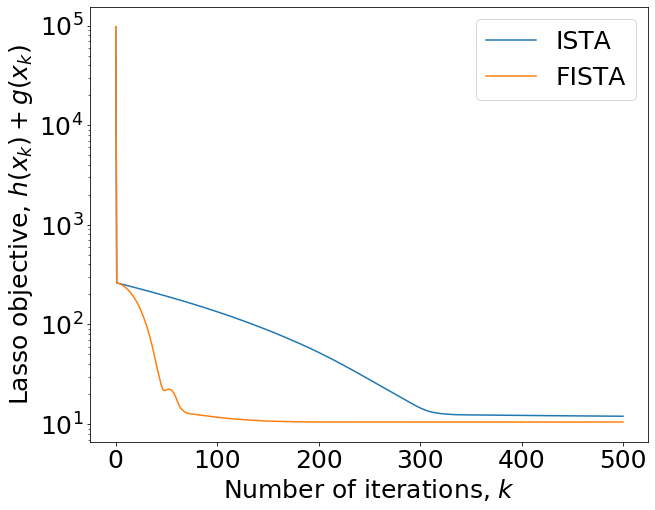

In [10]:
plt.figure(figsize=(10, 8))
fontsize=25
plt.plot([f(x) + gamma * np.linalg.norm(x, 1) for x in conv], label="ISTA")
plt.plot([f(x) + gamma * np.linalg.norm(x, 1) for x in conv_acc], label="FISTA")
plt.legend(fontsize=fontsize)
plt.xlabel(r"Number of iterations, $k$", fontsize=fontsize)
plt.ylabel(r"Lasso objective, $h(x_k) + g(x_k)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")

## Proximal algorithms highlights

- Very useful for composite objectives if one item is "simple"
- Many regularizers admit cheap prox evaluations
- Distributed optimization set up

## References

1. [Proximal algorithms](http://web.stanford.edu/~boyd/papers/pdf/prox_algs.pdf) and related [sources](http://web.stanford.edu/~boyd/papers/prox_algs.html) by N. Parikh and S. Boyd 
2. [Gradient-based algorithms with applications to signal recovery problems](http://www.math.tau.ac.il/~teboulle/papers/gradient_chapter.pdf) by A. Beck and M. Teboulle
3. [Proximal Backpropagation](https://arxiv.org/abs/1706.04638) by T Frerix et al (ICLR 2018)
4. [Stochastic Proximal Gradient Descent with Acceleration Techniques](https://papers.nips.cc/paper/5610-stochastic-proximal-gradient-descent-with-acceleration-techniques.pdf) by A. Nitanda (NIPS 2014)

In [7]:
import scipy.linalg as splin
import numpy as np
import matplotlib.pyplot as plt

def iterative_refinement(A, b, x0, num_iter, eps):
    x = x0.copy()
    n = x.shape[0]
    conv = [x]
    chol = splin.cho_factor(A + eps * np.eye(n))
    for i in range(num_iter):
        x = x + splin.cho_solve(chol, b - A @ x)
        conv.append(x)
    return x, conv

In [19]:
n = 100
k = 100
A = np.random.randn(n, k)
A = A @ A.T
b = np.random.randn(n)
num_iter = 100
x0 = np.random.randn(n)

In [20]:
eps_range = [100, 10, 1, 1e-1, 1e-2]
conv_hist = {}
for eps in eps_range:
    _, conv = iterative_refinement(A, b, x0, num_iter, eps)
    conv_hist[eps] = conv

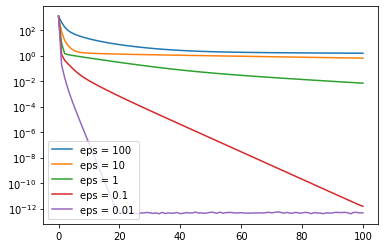

In [21]:
plt.figure()
for eps in eps_range:
    conv = [np.linalg.norm(A @ x - b) for x in conv_hist[eps]]
    plt.plot(conv, label="eps = {}".format(eps))
    plt.yscale("log")
plt.legend()

In [22]:
def gd(A, b, x0, num_iter):
    x = x0.copy()
    n = x.shape[0]
    conv = [x]
    for i in range(num_iter):
        x = x - 0.001 * (A @ x - b)
        conv.append(x)
    return x, conv

In [23]:
_, conv_grad = gd(A, b, x0, num_iter)

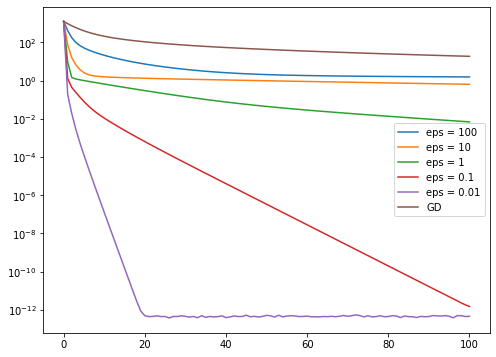

In [24]:
plt.figure(figsize=(8, 6))
for eps in eps_range:
    conv = [np.linalg.norm(A @ x - b) for x in conv_hist[eps]]
    plt.plot(conv, label="eps = {}".format(eps))
    plt.yscale("log")
conv_gd = [np.linalg.norm(A @ x - b) for x in conv_grad]
plt.plot(conv_gd, label="GD")
plt.legend()

In [25]:
f = lambda x: 0.5 * x @ (A @ x) - b @ x

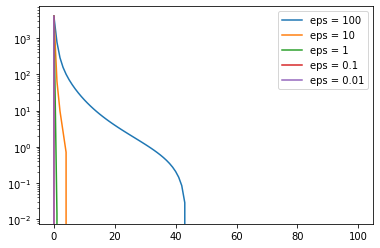

In [26]:
plt.figure()
for eps in eps_range:
    conv = [f(x) for x in conv_hist[eps]]
    plt.plot(conv, label="eps = {}".format(eps))
    plt.yscale("log")
plt.legend()